# COVID-19 Evolution Germany
2020-03-22

## Use the Gaussian Error-Function as the model

In [1]:
# define the error function for fitting
def fit_func(x,a,b):
    import scipy
    fit = 80E6*(scipy.special.erf(a*(x-b)) + 1)*0.5
    return fit

## Define the Data-Set

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import ticker
from matplotlib.dates import (DateFormatter, drange)
import seaborn as sns
import datetime
from scipy import interpolate
from scipy.optimize import curve_fit

In [3]:
# data for Germany from Johns Hopkins University
# https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6
ydata = np.array([
    0,0,0,0,0,1,4,4,4,5,8,10,12,12,12,12,13,13,14,14,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,27,46,\
    48,79,130,159,196,262,482,670,799,1040,1176,1457,1908,2078,3675,4585,5795,7272,9257,12327,15320,19848,
    22364,24873,29056,32986, 37323,43938, 50871, 57695, 62435])
# to Mar 29
xdata = np.arange(1,len(ydata)+1)
date_start = datetime.date(2020, 1, 22)
date_end   = date_start + datetime.timedelta(days=len(ydata))
dates_data = drange(date_start, date_end, datetime.timedelta(days=1))

## Fit the data to the model

In [4]:
# fit the data to the error function
popt, pcov = curve_fit(fit_func, xdata, ydata, p0=[0.04, 120])
yfit = fit_func(xdata, *popt)

# Plot the Results

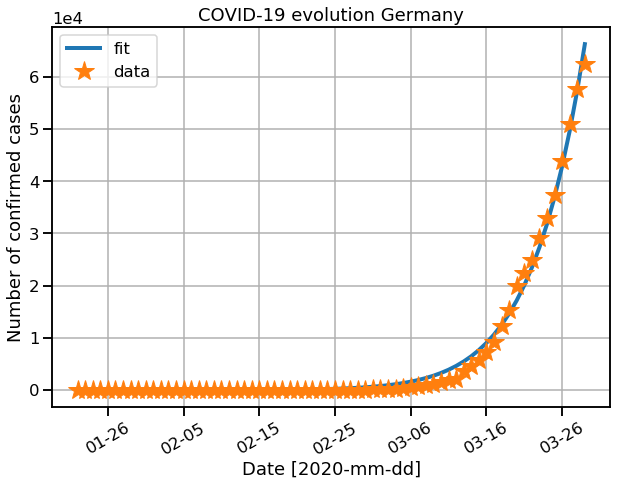

In [5]:
# plot the data and the fitted function
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(dates_data, yfit, '-', linewidth=4, label="fit")
ax.plot(dates_data, ydata, '*', linewidth=4, label="data", markersize=20)
ax.set_xlabel(r"Date [2020-mm-dd]")
ax.set_ylabel(r"Number of confirmed cases")
ax.set_title(r"COVID-19 evolution Germany")
ax.grid(True)
#ax.tick_params(labelsize=14)
ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))
ax.xaxis.set_tick_params(rotation=30)
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
plt.legend()
plt.show()
#fig.savefig('c1.png')

In [6]:
# extrapolate to the coming months
x_ex = np.arange(1, 150)
#y_ex = fit_func(x_ex, popt[0], popt[1])
y_ex = fit_func(x_ex, *popt)
date2 = date_start + datetime.timedelta(days=len(x_ex))
dates_ex = drange(date_start, date2, datetime.timedelta(days=1))

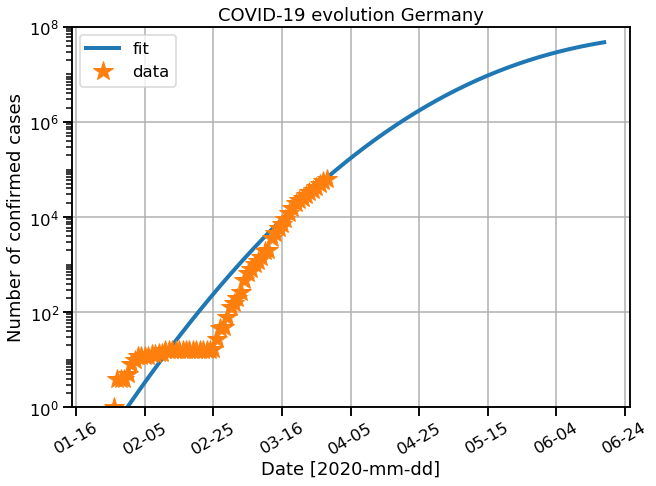

In [7]:
# plot the data and the extra-polation
fig, ax = plt.subplots(figsize=(10, 7))
ax.semilogy(dates_ex, y_ex, '-', linewidth=4, label="fit")
ax.semilogy(dates_data, ydata, '*', linewidth=4, label="data", markersize=20)
ax.set_xlabel(r"Date [2020-mm-dd]") # , fontsize=14)
ax.set_ylabel(r"Number of confirmed cases") # , fontsize=14)
ax.set_title(r"COVID-19 evolution Germany") # , fontsize=22)
ax.grid(True)
ax.set_ylim(1, 100E6)
ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))
ax.xaxis.set_tick_params(rotation=30)# , labelsize=10)
locmin = ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(ticker.NullFormatter())
plt.legend()
plt.show()
#fig.savefig('c2.png')

In [8]:
# Calculate some statistics
date_interpolate = interpolate.interp1d(y_ex, x_ex)
date_1M = date_start + datetime.timedelta(days=float(date_interpolate(1E6)))
date_peak = date_start + datetime.timedelta(days=popt[1])

In [9]:
print('Estaimted day, when 1 million people are infected: {0}'.format(date_1M))
print('Estimated day with the peak in the new infections: {0}'.format(date_peak))

Estaimted day, when 1 million people are infected: 2020-04-20
Estimated day with the peak in the new infections: 2020-06-13


## Calculate the Probability to have at least one positive case in your company

In [10]:
# calculate the probability to have at least one infection in your company
people_germany = 80E6
people_company = 300
name_company = "ESO"

array_prob_company = np.array([0])
for day in np.arange(0,len(x_ex)-1):
    number_infections = y_ex[day]
    prob_company = 1 - np.exp(-people_company*(number_infections/people_germany))
    array_prob_company = np.append(array_prob_company, prob_company)

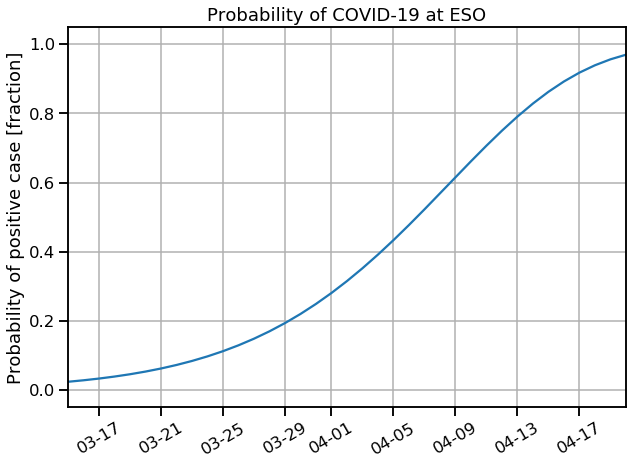

In [11]:
# plot the probability to have at least one infection in your company
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot_date(dates_ex, array_prob_company, '-')
ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))
ax.xaxis.set_tick_params(rotation=30)# , labelsize=10)
ax.set_ylabel(r"Probability of positive case [fraction]")
ax.set_title(r"Probability of COVID-19 at {0}".format(name_company))
ax.grid(True)
ax.set_xlim(datetime.date(2020, 3, 15), datetime.date(2020, 4, 20))
#ax.tick_params(labelsize=14)
# plt.legend(fontsize=14)
plt.savefig('prob_' + name_company + '.png')
plt.show()

## Historical Evolution

In [12]:
# calculate the evolution of the estimated day of the peak infections
date_start_history = datetime.date(2020, 3, 10)
date_peak_history = np.array([])
date_1M_history = np.array([])
dates_history = drange(date_start_history, date_end, datetime.timedelta(days=1))
for day in dates_history:
    ydata_history = ydata[dates_data<=day]
    xdata_history = xdata[dates_data<=day]

    # fit the data to the error function
    popt, pcov = curve_fit(fit_func, xdata_history, ydata_history, p0=[0.04, 120])
    date_peak_history = np.append(date_peak_history, date_start + datetime.timedelta(days=popt[1]))
    date_1M_history = np.append(date_1M_history, date_start + datetime.timedelta(days=(-1.5868/popt[0]+popt[1])))

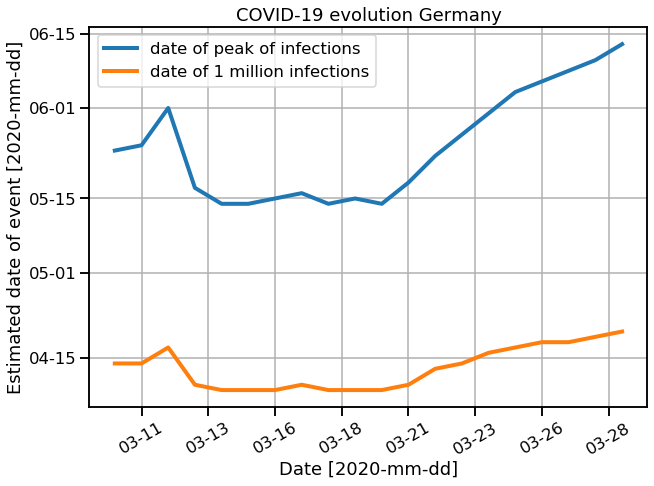

In [20]:
# plot the estimated day of the peak infections versus time
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(dates_history, date_peak_history, '-', linewidth=4, label="date of peak of infections")
ax.plot(dates_history, date_1M_history, '-', linewidth=4, label="date of 1 million infections")
ax.set_xlabel(r"Date [2020-mm-dd]")
ax.set_ylabel(r"Estimated date of event [2020-mm-dd]")
ax.set_title(r"COVID-19 evolution Germany")
ax.grid(True)
#ax.tick_params(labelsize=14)
ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))
ax.yaxis.set_major_formatter(DateFormatter('%m-%d'))
ax.xaxis.set_tick_params(rotation=30)
plt.legend()
plt.show()

-1.5849506825111517


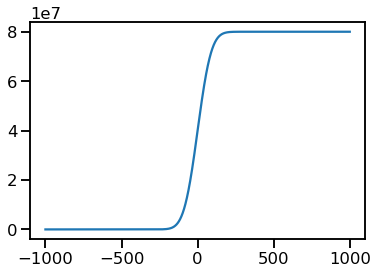

In [19]:
# calculate the argument of the fit_func for 1 million infections
p = [0.01,0]
x = np.arange(-1000, 1001, 1)
y = fit_func(x, *p)
plt.plot(x,y)
d_i = interpolate.interp1d(y, x)
d_1M = d_i(1E6)
print(p[0]*d_1M)